# Linear Regression Assignment [Capital Bike Share System]

Capital Bike Share System aspires to understand the demand for shared bikes among the people across United States. They have planned this to prepare themselves to cater to the people's needs to stand out from other service providers, ensuring customer delight and make huge profits.


Assuming we have been approached by the firm to understand the factors on which the demand for these shared bikes depends. Specifically, the firm wants to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

#### 1) Which variables are significant in predicting the demand for shared bikes?

#### 2) How well those variables describe the bike demands?

Based on various meteorological surveys and preferences of people, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Data Source  : https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


#### Business Goal:
#### We are required to model the demand for shared bikes with the available independent variables. 
It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



## Outline of the assignment
- We will do the following:
    - Phase 1: Data preparation
    - Phase 2: Exploratory Data Analysis and data visualisation
    - Phase 3: Pre-processing the dataset for model building
    - Phase 4: Model building using linear regression
    - Phase 5: Residual analysis and predictions

## PHASE 1 : DATA PREPARATION

#### First we import the necessary libraries, and read the dataset to introduce ourselves to the type of data we need to work with.

In [341]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 
warnings.filterwarnings('ignore')

In [342]:
#read the dataset (name is chosen as df 'dataframe' as it is easy to work with)
df=pd.read_csv('C:\\Users\\aswin\\Downloads\\Bike-Sharing-Dataset\\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### We notice that the names of some of the columns, though legible, have some spelling errors. We correct them for better understanding.

In [343]:
#Correcting the column names
df1=df.rename(columns = {'yr':'year', 'mnth':'month', 'hum':'humidity', 'cnt':'count'}, inplace=False)

In [344]:
df1.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [345]:
#find the current size of the dataset
df1.shape

(731, 16)

#### Each observation in the dataset represent one particular day across the two year time period or time frame.

In [346]:
# Dropping the duplicates(if any) from the dataset. 
df1.drop_duplicates(subset=None, inplace=True)

In [347]:
# Checking the shape after duplicates are removed. 
df1.shape

(731, 16)

There are no duplicate rows in the dataset as we see that the shape remains the same.

-We look at the first five rows of the dataset to get a feel of the data we will be working with. We notice that the dataset has 730 rows and 16 columns.

-The 'instant' column adds no value to the dataset for analysis, so we will drop it.

-We also see that 'casual' and 'registered' combined form the count column, hence we will not be needing those two columns, so we will drop them as well.

-The 'dteday' column also does not add any value for the purpose of analysis since all the data is available in the month and year columns, thus we drop it. 

In [348]:
#drop columns that add no value to the analysis
df1=df1.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [349]:
#check the size of the dataset again to make sure the columns were dropped
df1.shape

(731, 12)

After the removal of the four columns above, our dataset now has 12 columns.

We also see that some columns have numbers representing categorical data such as season, year, month, weekday and weathersit. This may be counterproductive when creating a model.
It might assume that a higher number has a higher or lower importance than the others when in reality, they are non-ordinal categorical data with each value having equal importance.

Hence, we create dictionaries and map the values to the data in the dataset.

In [350]:
#create mapping dictonaries to convert numerical data that are in effect, categorical
season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
month_dict = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
weekday_dict = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
weathersit_dict = {1:'clear', 2:'mist-cloudy', 3:'light snow-rain', 4:'heavy snow-rain'}

In [351]:
#convert the data from numeric type to categorical for better analysis
df1.season=df1.season.map(season_dict)
df1.month=df1.month.map(month_dict)
df1.weekday=df1.weekday.map(weekday_dict)
df1.weathersit=df1.weathersit.map(weathersit_dict)

Finally, we check if the changes applied are shown in the dataset before moving to the next step.

In [352]:
#check if the changes applied, are reflected in the dataset
df1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,January,0,Saturday,0,mist-cloudy,0.344167,0.363625,0.805833,0.160446,985
1,spring,0,January,0,Sunday,0,mist-cloudy,0.363478,0.353739,0.696087,0.248539,801
2,spring,0,January,0,Monday,1,clear,0.196364,0.189405,0.437273,0.248309,1349
3,spring,0,January,0,Tuesday,1,clear,0.200000,0.212122,0.590435,0.160296,1562
4,spring,0,January,0,Wednesday,1,clear,0.226957,0.229270,0.436957,0.186900,1600


In [353]:
#check the datatypes for each column and also note the number of null values if present
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   year        731 non-null    int64  
 2   month       731 non-null    object 
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   humidity    731 non-null    float64
 10  windspeed   731 non-null    float64
 11  count       731 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.2+ KB


In [354]:
# check the description of the numerical data to see if there are any outliers or logical errors in the data
df1.describe().round(2)

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,0.5,0.03,0.68,0.50,0.47,0.63,0.19,4504.35
std,0.5,0.17,0.47,0.18,0.16,0.14,0.08,1937.21
min,0.0,0.00,0.00,0.06,0.08,0.00,0.02,22.00
25%,0.0,0.00,0.00,0.34,0.34,0.52,0.13,3152.00
50%,1.0,0.00,1.00,0.50,0.49,0.63,0.18,4548.00
75%,1.0,0.00,1.00,0.66,0.61,0.73,0.23,5956.00
max,1.0,1.00,1.00,0.86,0.84,0.97,0.51,8714.00


The description of the dataset shows that all the values are in the acceptable range and there is no logical error in them. We now check if there are any missing values that require treatment from our end.

In [355]:
#check for null values
df1.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

There are no missing or null values in the dataset.

### Summary
- In the data preparation phase
 - We import the required libraries and familiarise ourselves with the dataset
 - We drop the columns that do not add value towards analysing the dataset
 - We map the categorical data represented by numerals into strings
 - We check for logical inconsistencies and outliers if any
 - We check for null or empty values in the dataset if any and treat them

Now the dataset is clean for further analysis.

## PHASE 2: EXPLORATORY DATA ANALYSIS

### Univariate Analysis

#### Categorical columns: 
    - Season
    - Year
    - Month
    - Holiday
    - Weekday
    - Workingday
    - Weathersit

In [356]:
#Days in each season
df1.season.value_counts()

fall      188
summer    184
spring    181
winter    178
Name: season, dtype: int64

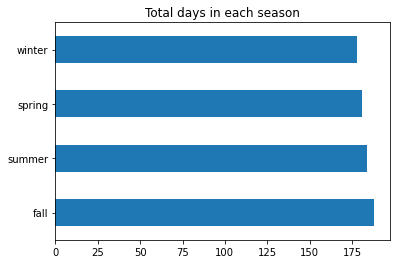

In [357]:
#Days in each season
df1.season.value_counts().plot.barh()
plt.title('Total days in each season')
plt.show()

Observation : We observe that almost all the seasons span the same amount of time across the years.

In [358]:
#How many days in each year do we have the data for? (0 is 2018, 1 is 2019)
df1.year.value_counts()

1    366
0    365
Name: year, dtype: int64

The value 1 represents the year 2012 which is a leap year and hence the count corresponds to 366 days.

#### This indicates that the data present is for the two whole years, 2011 and 2012.

In [359]:
# Number of days in each month over the two years
df1.month.value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     57
Name: month, dtype: int64

In [360]:
#Number of days in two years that were holidays - here holidays refers to those days excluding the weekends
df1.holiday.value_counts()

0    710
1     21
Name: holiday, dtype: int64

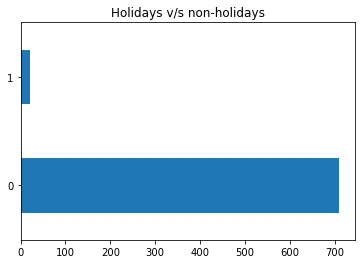

In [361]:
#Number of days in two years that were holidays(1 is 'yes', 0 is 'no')
df1.holiday.value_counts().plot.barh()
plt.title('Holidays v/s non-holidays')
plt.show()

#### There are 21 holidays over the 731 days in the two years of the dataset.

In [362]:
#How many times does each week day occur over the timeline of the dataset.
df1.weekday.value_counts()

Saturday     105
Sunday       105
Monday       105
Tuesday      104
Wednesday    104
Thursday     104
Friday       104
Name: weekday, dtype: int64

In [363]:
# Number of working days over the timeline of the dataset (1 is 'yes', 0 is 'no')
df1.workingday.value_counts()

1    500
0    231
Name: workingday, dtype: int64

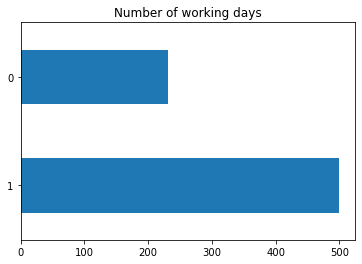

In [364]:
# Plot for number of working days
df1.workingday.value_counts().plot.barh()
plt.title('Number of working days')
plt.show()

#### There are 500 working days in the two years combined.

In [365]:
# Days with each type of weather situation over the timeline of the dataset
df1.weathersit.value_counts()

clear              463
mist-cloudy        247
light snow-rain     21
Name: weathersit, dtype: int64

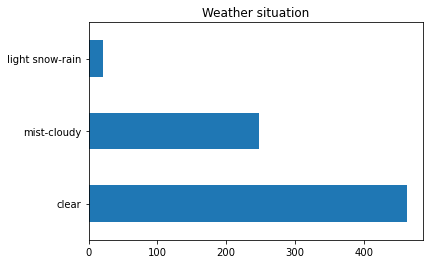

In [366]:
# Plot for days with each type of weather situation over the timeline of the dataset
df1.weathersit.value_counts().plot.barh()
plt.title('Weather situation')
plt.show()

#### Business takeaway: One thing to note here is that none of the data has 'heavy rain' as its weather situation. This either means that Capital Bike Share does not allow rentals during heavy rains, or that customers do not use the service in heavy rains, or that the region has not received heavy rains for the timeline of the dataset. 

#### Technical takeaway: From an analysis perspective, during the dummy creation, we can skip heavy rain and only use the three values mentioned here.

#### Numerical data: 
    - Temp
    - Atemp 
    - Humidity
    - Windspeed
    - Count(Target variable)

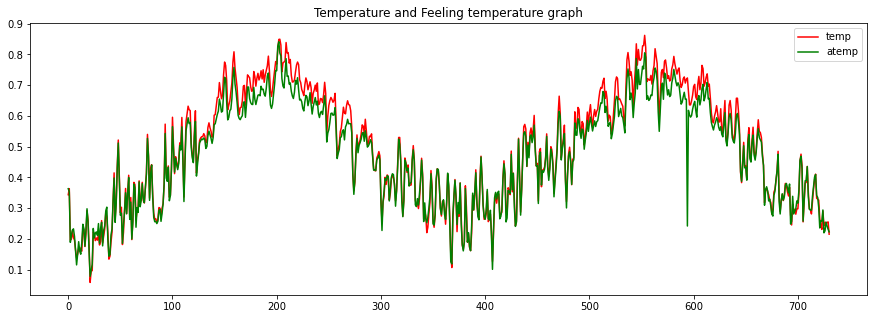

In [367]:
#Temperature and feeling temperature
plt.figure(figsize=[15,5])
plt.plot(df1.temp, color = 'red')
plt.plot(df1.atemp, color = 'green')
plt.legend(['temp', 'atemp'])
plt.title('Temperature and Feeling temperature graph')
plt.show()

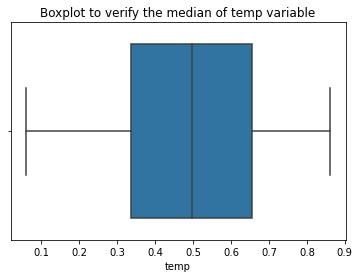

In [368]:
#Verifying the median of the temp variable
sns.boxplot(df1.temp)
plt.title('Boxplot to verify the median of temp variable')
plt.show()

In [369]:
df1.temp.median()

0.498333

Given in the dataset the minimum temperature observed was -8 degree celcius and maximum observed temperature was +39 degree celcius.
Converting back into celcius from the normalized scale, **we observe that the median temperature across the 2 year time period is close to 15 degree celcius.**

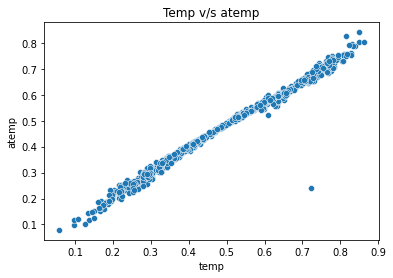

In [370]:
sns.scatterplot(df1.temp, df1.atemp)
plt.title('Temp v/s atemp')
plt.show()

#### This overlapped line graph and a linear scatter plot are a clear indication that 'temp' and 'atemp' are highly correlated. It makes sense that on days where the actual temperature is high, the feeling temperature is high too and vice versa. We can drop one of the columns since they give the same information. Just to be sure of this before dropping, we will also see their relationship in pairplots, correlation matrix and heatmap.

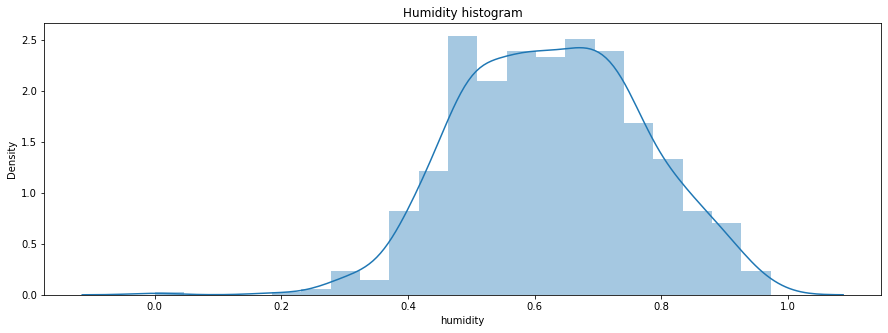

In [371]:
plt.figure(figsize=[15,5])
sns.distplot(df1.humidity)
plt.title('Humidity histogram')
plt.show()

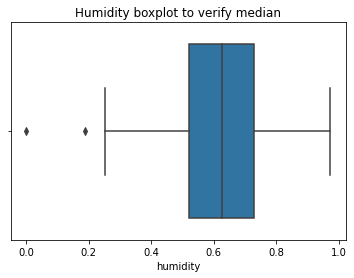

In [372]:
sns.boxplot(df1.humidity)
plt.title('Humidity boxplot to verify median')
plt.show()

In [373]:
df1.humidity.median()

0.626667

Note: Given in the dataset the attribute information for the variable humidity is normalized by dividing the actual recorded value of humidity by 100.

#### Most days, humidity is between 40 and 80 percent, with medain around 63 percent.

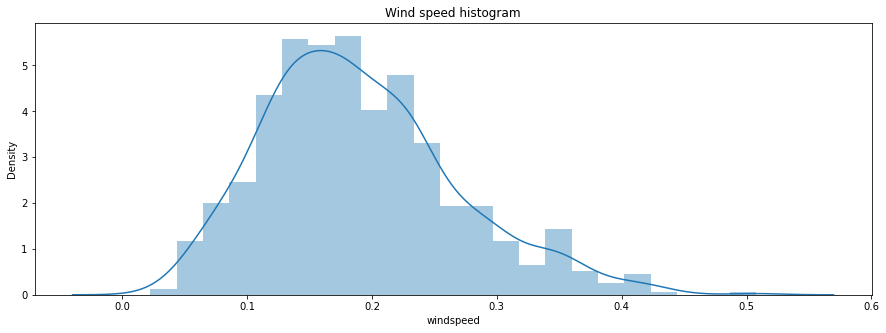

In [374]:
plt.figure(figsize=[15,5])
sns.distplot(df1.windspeed)
plt.title('Wind speed histogram')
plt.show()

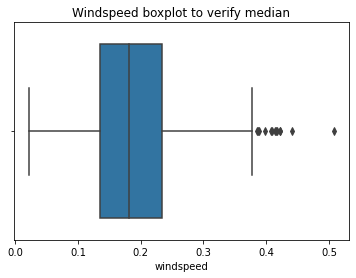

In [375]:
sns.boxplot(df1.windspeed)
plt.title('Windspeed boxplot to verify median')
plt.show()

Note: Given in the dataset the attribute information for the variable windspeed is normalized by dividing the actual recorded value of windspeed by 67.

In [376]:
med_nor_ws = df1.windspeed.median()
print('The normalized median windspeed is {} kmph'.format(med_nor_ws))
print('The recorded median windpseed is {} kmph'.format(med_nor_ws*67))

The normalized median windspeed is 0.180975 kmph
The recorded median windpseed is 12.125325 kmph


#### Most days, wind speed is between 5kmph and 20kmph with a median around 12kmph.

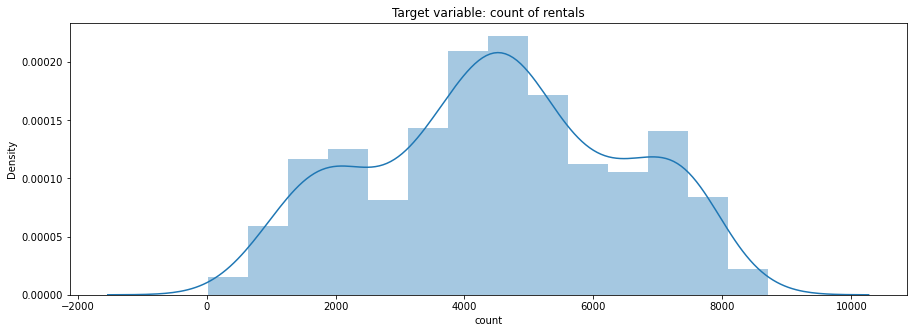

In [377]:
plt.figure(figsize=[15,5])
sns.distplot(df1['count'])
plt.title('Target variable: count of rentals')
plt.show()

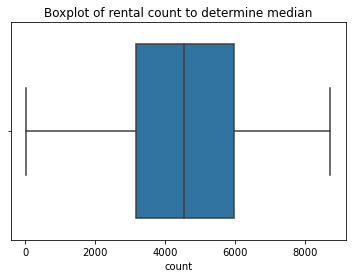

In [378]:
sns.boxplot(df1['count'])
plt.title('Boxplot of rental count to determine median')
plt.show()

#### Technical takeaway: The boxplot and distplot show that the median number of rentals on any given day is approximately 4550, which can be verified from the describe() and median() function where the exact value is 4548.
#### Business takeaway: An expected value of average number of daily rentals can be close to 4500. The business might need to make sure that on an average, 4500 bookings are made.

In [379]:
df1['count'].median() #verification of findings 

4548.0

In [380]:
df1['count'].mean() #verification of findings 

4504.3488372093025

## Bivariate and multivariate analysis

#### For bivariate and multivariate anaylsis, we will look at boxplots of cateogorical variables and pairplots of numeric variables which will give us a summary of the relationship between any two variables/columns.

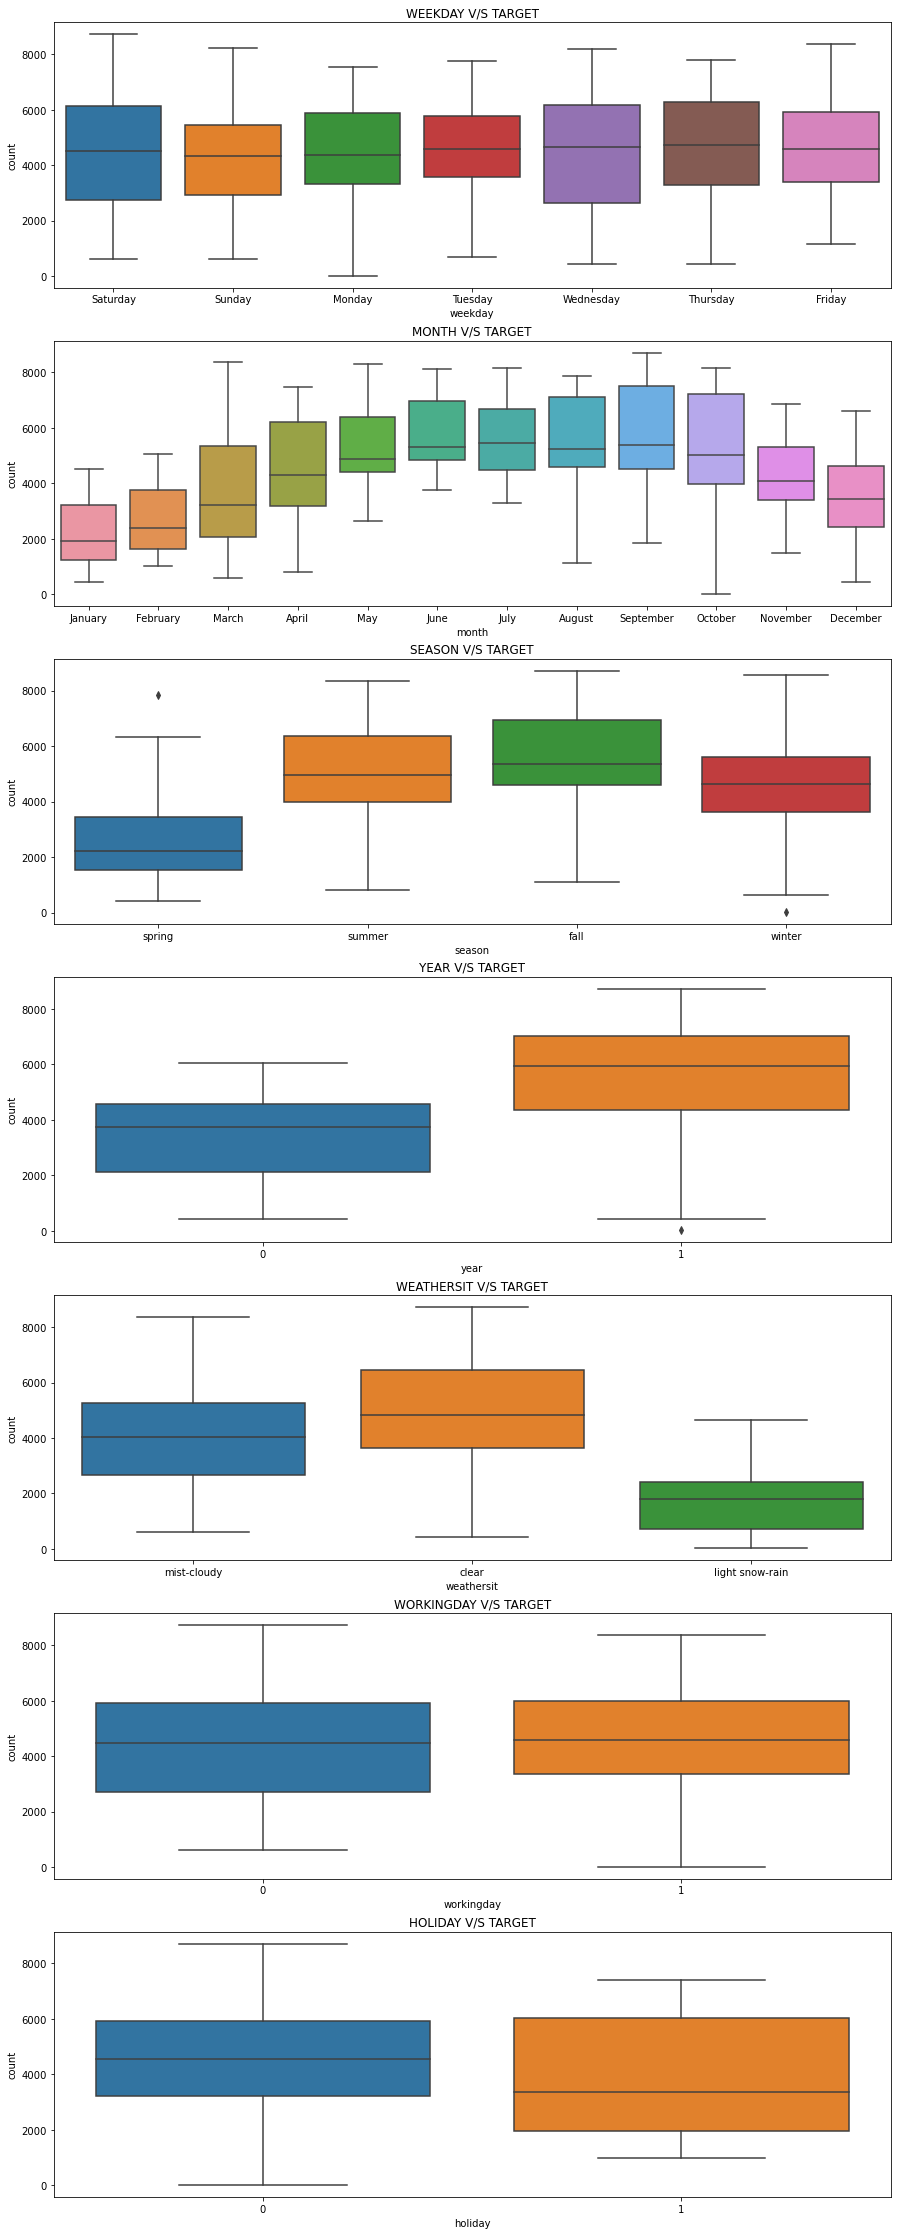

In [381]:
#Analysing boxplots of categorical variables against the target variable
plt.figure(figsize=[15,40])
plt.subplot(7,1,1)
sns.boxplot(df1.weekday, df1['count'])
plt.title('WEEKDAY V/S TARGET')
plt.subplot(7,1,2)
sns.boxplot(df1.month, df1['count'])
plt.title('MONTH V/S TARGET')
plt.subplot(7,1,3)
sns.boxplot(df1.season, df1['count'])
plt.title('SEASON V/S TARGET')
plt.subplot(7,1,4)
sns.boxplot(df1.year, df1['count'])
plt.title('YEAR V/S TARGET')
plt.subplot(7,1,5)
sns.boxplot(df1.weathersit, df1['count'])
plt.title('WEATHERSIT V/S TARGET')
plt.subplot(7,1,6)
sns.boxplot(df1.workingday, df1['count'])
plt.title('WORKINGDAY V/S TARGET')
plt.subplot(7,1,7)
sns.boxplot(df1.holiday, df1['count'])
plt.title('HOLIDAY V/S TARGET')
plt.show()

#### The boxplots gives as an overview of distribution of the number of bike rentals with respect to the different values of the categorical variables across the two year time period

#### We notice from these boxplots:
#### 1. The median number of bike rentals are almost similar across all days of the week, thus workingday or weekend have a similar distribution.
#### 2. We see a higher bulk of the usage during the summer and fall months as compared to winter and spring.
#### 3. This is again seen in the boxplots of seasons, that fall has the highest number of rentals followed by summer.
#### 4. The rentals have been considerably higher in 2012 than in 2011, which indicates that the service is being used more. The business should upscale accordingly.
#### 5. Non holidays have a wider range of rental numbers, but have a higher median than holiday rentals. The higher median can be be associated with employees who've been using this service as a transit during working days.

In [382]:
# Percentage of bike bookings for weather conditions
df1.groupby(['weathersit'])['count'].sum()/ (df1['count'].sum())*100

weathersit
clear              68.574920
light snow-rain     1.150097
mist-cloudy        30.274983
Name: count, dtype: float64

#### Business takeaway: We see that approximately 69 percent of the bookings are made during clear weather and none during heavy rains. This shows that the business must focus their rentals and advertisements during clear weather as opposed to rainy or stormy weather. As the weather worsens, the rental numbers drop too. Capital Bike Share should focus on rental availability and advertisements during clear weather to drive up revenue even further.

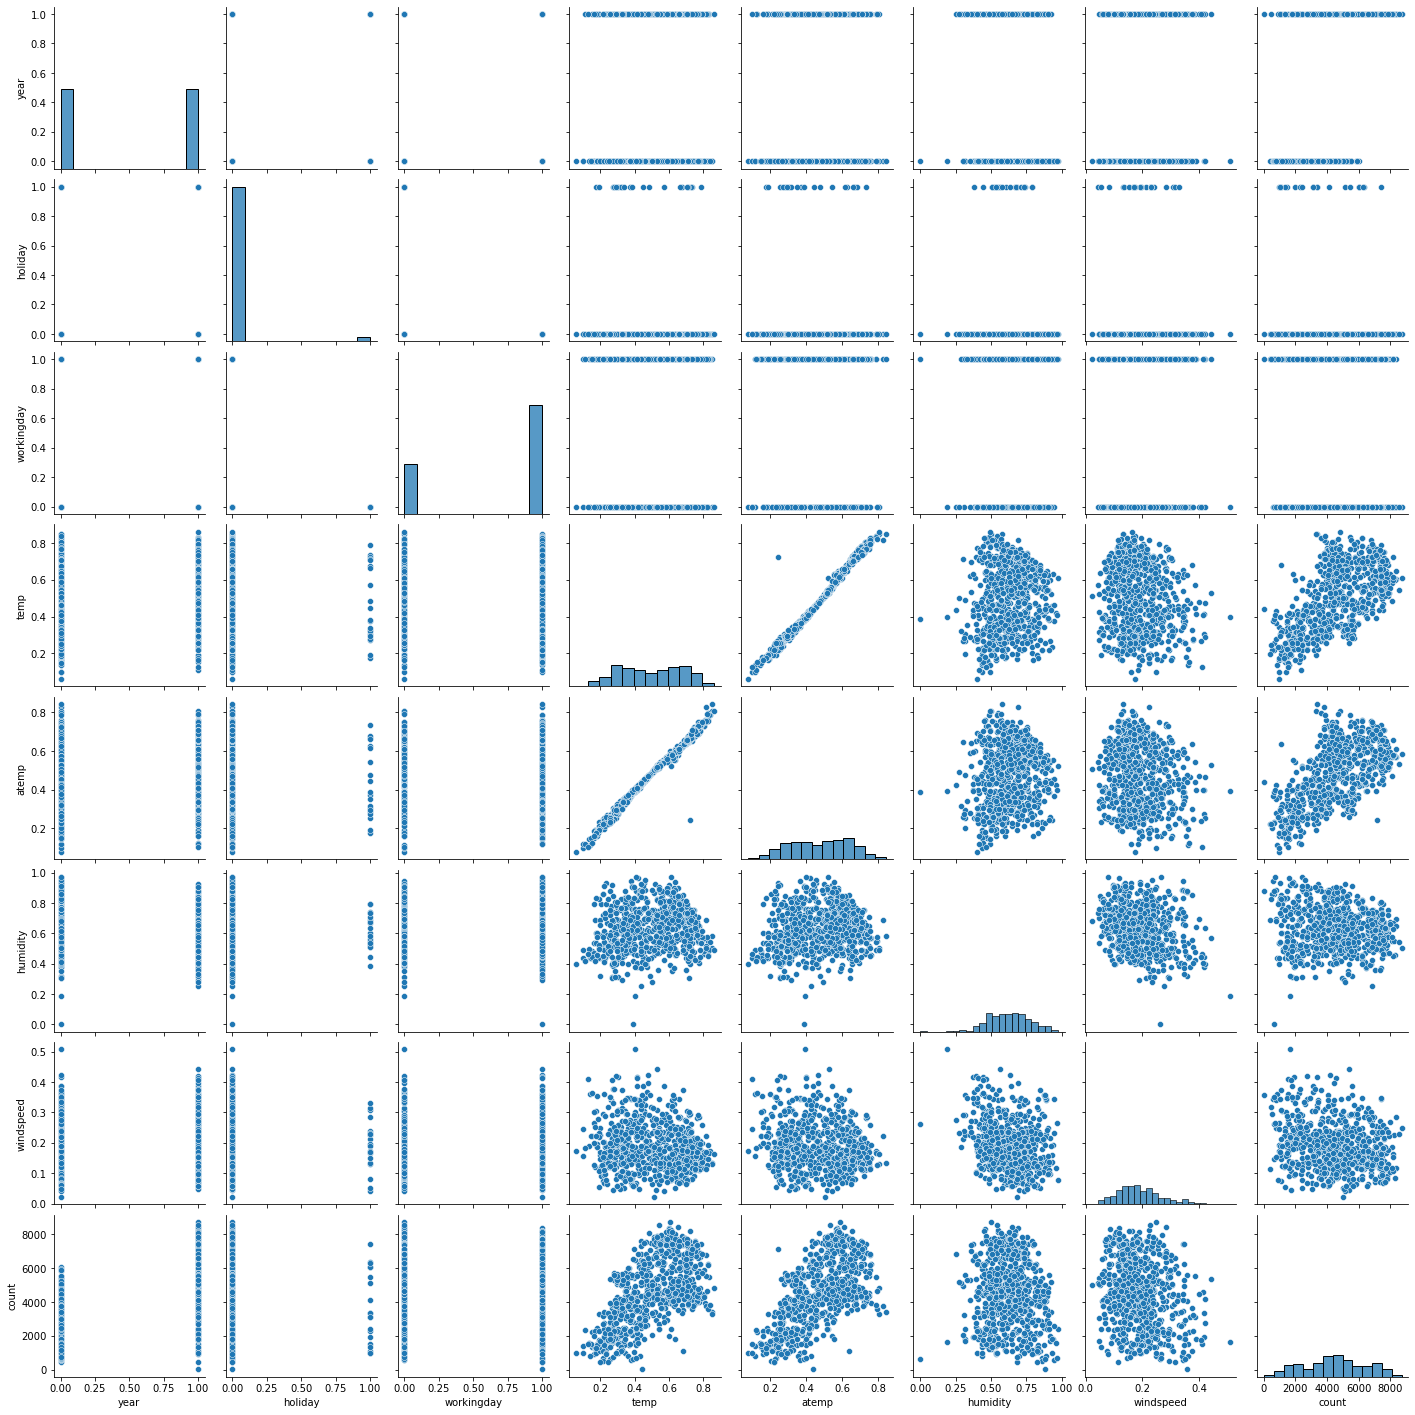

In [383]:
#Plot the heatmap to check relationships between numerical variables
sns.pairplot(df1)
plt.show()

We confirm that there is a strong relationship between temp and atemp (actual temperature and felt temperature), hence we can suggest about dropping one of the columns. To ensure that the relationship is indeed quite strong, we can cross-check with the correlation matrix and heat map as well and later arrive on with a conclusion.

We see a slight relationship between temperature and count. Other than that, there seems to be no variable that is strongly related to any other. To confirm, we will look at the correlation matrix and heatmap.

What we have seen so far from the business perspective is that clear weather, and as a result summer and fall seasons have a better rental performance. Also, we see that rentals across the week remain similar.

In [384]:
df1.corr()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
year,1.000000,0.007954,-0.002013,0.047604,0.046106,-0.110651,-0.011817,0.566710
holiday,0.007954,1.000000,-0.253023,-0.028556,-0.032507,-0.015937,0.006292,-0.068348
workingday,-0.002013,-0.253023,1.000000,0.052660,0.052182,0.024327,-0.018796,0.061156
temp,0.047604,-0.028556,0.052660,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.046106,-0.032507,0.052182,0.991702,1.000000,0.139988,-0.183643,0.631066
humidity,-0.110651,-0.015937,0.024327,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.011817,0.006292,-0.018796,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
count,0.566710,-0.068348,0.061156,0.627494,0.631066,-0.100659,-0.234545,1.000000


<AxesSubplot:>

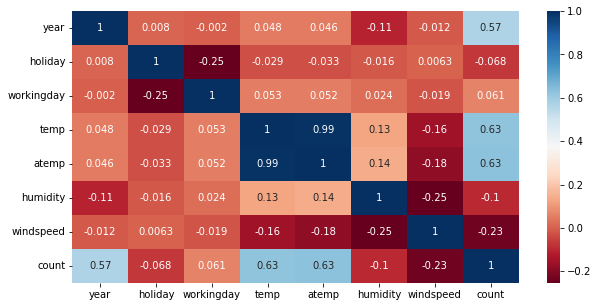

In [385]:
plt.figure(figsize=[10,5])
sns.heatmap(df1.corr(), cmap='RdBu', annot = True)

We see from the line graphs, pairplots, correlation matrix and heatmap that temp and atemp are very strongly correlated. Thus, we can drop one of the columns as they indicate a similar parameter. We feel that the actual temperature is slightly more accurate than the felt temperature, hence we will drop the 'atemp' column and keep the 'temp' column. Other than that, there are no columns that strongly influence any other.

In [386]:
df1=df1.drop('atemp', axis=1)

In [387]:
df1.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,January,0,Saturday,0,mist-cloudy,0.344167,0.805833,0.160446,985
1,spring,0,January,0,Sunday,0,mist-cloudy,0.363478,0.696087,0.248539,801
2,spring,0,January,0,Monday,1,clear,0.196364,0.437273,0.248309,1349
3,spring,0,January,0,Tuesday,1,clear,0.200000,0.590435,0.160296,1562
4,spring,0,January,0,Wednesday,1,clear,0.226957,0.436957,0.186900,1600
5,spring,0,January,0,Thursday,1,clear,0.204348,0.518261,0.089565,1606
6,spring,0,January,0,Friday,1,mist-cloudy,0.196522,0.498696,0.168726,1510
7,spring,0,January,0,Saturday,0,mist-cloudy,0.165000,0.535833,0.266804,959
8,spring,0,January,0,Sunday,0,clear,0.138333,0.434167,0.361950,822
9,spring,0,January,0,Monday,1,clear,0.150833,0.482917,0.223267,1321


We will plot the heatmap once again to see if there are any more columns that need attention, before we move onto the machine learning phase.

<AxesSubplot:>

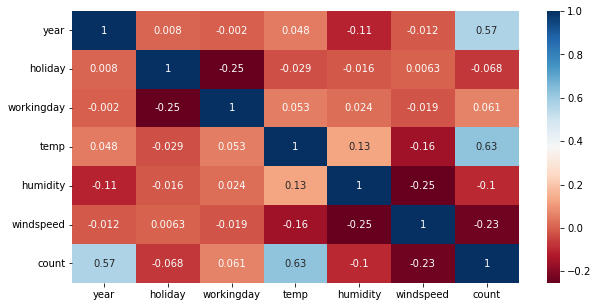

In [388]:
plt.figure(figsize=[10,5])
sns.heatmap(df1.corr(), cmap='RdBu', annot = True)

### Summary
In the exploratory data analysis phase:
- We analyse the categorical columns with the help of bar charts
- We analyse the numerical columns using histograms
- We analyse categorical variables against the target variable using boxplots
- We analyse the numerical variables against each other using pairplots and line graphs
- We analyse the correlations between the variables with the help of heatmap
- We drop the atemp column because it is highly correlated to temp and gives essentially the same information (to reduce the redundancy and to reduce the model complexity)

#### Business takeaways
- Clear weather, summer and fall months, non-holidays and recent years compared to past years show a positive trend towards bike rentals.

#### We see that there are no more columns that have a strong correlation between them. We have analysed the dataset and the columns separately (univariate) and in conjunction (multivariate) to see if one variable impacts any other. We find that in the final heatmap above, all variables are independent of each other. 

#### We can now move to the machine learning and linear regression phase where we use this cleaned and analysed dataset to build a model.

## PHASE 3: PRE-PROCESSING THE DATASET FOR MODEL BUILDING

### Creating dummies for the categorical variables season, month, weekday and weathersit

In [389]:
season_status = pd.get_dummies(df1['season'], drop_first=True)
month_status = pd.get_dummies(df1['month'], drop_first=True)
weekday_status = pd.get_dummies(df1['weekday'], drop_first=True)
weathersit_status = pd.get_dummies(df1['weathersit'], drop_first=True)

### Verify that dummies have been created along with dropping one column to optimise it to k-1 columns.

In [390]:
season_status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [391]:
month_status.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [392]:
weekday_status.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [393]:
weathersit_status.head()

,light snow-rain,mist-cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


### We will now concatenate the derived dummies into the dataset and remove the original columns which have now become redundant.

In [394]:
#concatenating the derived dummy variables with the dataset
df1=pd.concat([df1, season_status, month_status, weekday_status, weathersit_status], axis=1)
df1.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow-rain,mist-cloudy
0,spring,0,January,0,Saturday,0,mist-cloudy,0.344167,0.805833,0.160446,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,January,0,Sunday,0,mist-cloudy,0.363478,0.696087,0.248539,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,January,0,Monday,1,clear,0.196364,0.437273,0.248309,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,clear,0.200000,0.590435,0.160296,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,January,0,Wednesday,1,clear,0.226957,0.436957,0.186900,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,spring,0,January,0,Thursday,1,clear,0.204348,0.518261,0.089565,1606,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,spring,0,January,0,Friday,1,mist-cloudy,0.196522,0.498696,0.168726,1510,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,spring,0,January,0,Saturday,0,mist-cloudy,0.165000,0.535833,0.266804,959,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8,spring,0,January,0,Sunday,0,clear,0.138333,0.434167,0.361950,822,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,spring,0,January,0,Monday,1,clear,0.150833,0.482917,0.223267,1321,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [395]:
# dropping the columns for which the dummies have been added to the dataset
df1=df1.drop(['season', 'month', 'weekday', 'weathersit'], axis=1)
df1.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow-rain,mist-cloudy
0,0,0,0,0.344167,0.805833,0.160446,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0.363478,0.696087,0.248539,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0.196364,0.437273,0.248309,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.590435,0.160296,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0.226957,0.436957,0.186900,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### We will now split the dataset 70:30 to form the training and testing dataset, followed by scaling the numerical column(target column) using the Min-Max scaler.

In [396]:
 pd.set_option ('display.max_columns', None)

In [397]:
#Scaling the numerical variables using the Min-Max method so that the values are all between 0 and 1
scaler = MinMaxScaler()
num_vars = ['count']
df1[num_vars] = scaler.fit_transform(df1[num_vars])
df1.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow-rain,mist-cloudy
0,0,0,0,0.344167,0.805833,0.160446,0.110792,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0.363478,0.696087,0.248539,0.089623,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0.196364,0.437273,0.248309,0.152669,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.590435,0.160296,0.177174,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0.226957,0.436957,0.186900,0.181546,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [398]:
#Describe the scaled variables to see if the data has been scaled correctly
df1[num_vars].describe()

,count
count,731.000000
mean,0.515687
std,0.222873
min,0.000000
25%,0.360101
50%,0.520709
75%,0.682697
max,1.000000


#### We see from the description above that the target column representing the number of bike rentals on a particular day in the training dataset have been scaled properly since the minimum for thecolumns is now 'zero' and the maximum is 'one'.

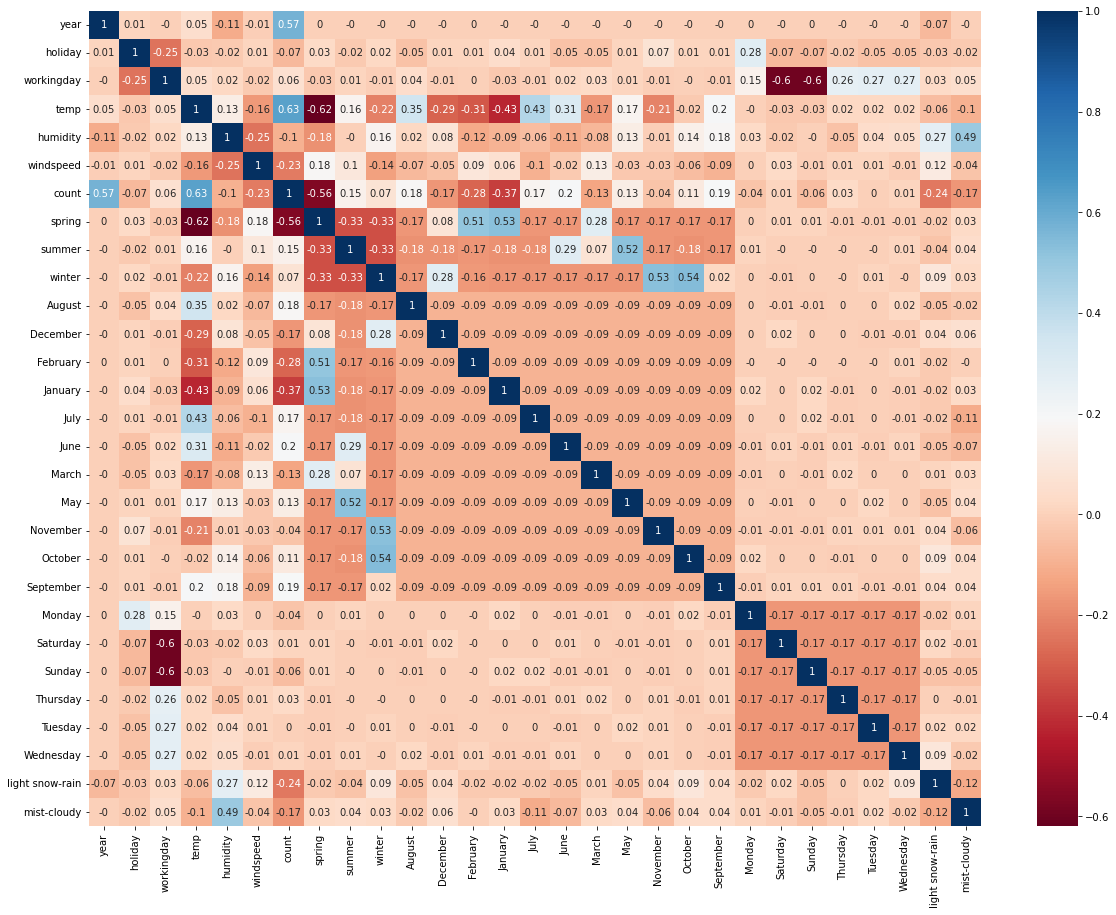

In [399]:
#Plot a heatmap of the dataset to see the correlations
plt.figure(figsize=[20,15])
sns.heatmap(round(df1.corr(),2), annot=True, cmap='RdBu')
plt.show()

In [400]:
df1.columns.size

29

In [420]:
list_columns = list(df1.columns)
list_columns.remove('count')
features = list_columns

### Summary
In the pre processing phase:
- We created dummies for the categorical data
- We concatenated those dummies into the dataset
- We removed the redundant columns for which dummies are now present
- We scaled the numerical data using the Min-Max scaler
- We plot the heatmap to find visual cues(signal to perform a particular action) of correlation in the dataset

## PHASE 4: MODEL BUILDING USING LINEAR REGRESSION

In [410]:
#Splitting the dataset into training and testing datasets at random
df_train, df_test = train_test_split(df1, train_size=0.7, random_state=11)
print(df_train.shape)
print(df_test.shape)

(511, 29)
(220, 29)


In [424]:
# Split the training dataset into the target data (y_train) and the predictor variables (X_train)
y_train = df_train[['count']]
X_train = df_train[features]

In [425]:
# use RFE to automate variable selection for the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [426]:
lm.score(X_train,y_train)

0.8511328625614469

In [427]:
y_test = df_test[['count']]
X_test = df_test[features]

In [428]:
lm.score(X_test,y_test)

0.8169823833785033

In [429]:
y_predictions = lm.predict(X_train)

#### Using Feature Selection

In [430]:
corr_series = df_train.corrwith(df_train['count']).sort_values()
corr_greater_15 = corr_series[(corr_series>0.1)]
corr_lesser_15 = corr_series[(corr_series<-0.1)]
corr_series_1 = pd.concat([corr_greater_15,corr_lesser_15])
corr_series = corr_series_1.drop('count')
corr_series.index

Index(['October', 'July', 'August', 'May', 'summer', 'September', 'June',
       'year', 'temp', 'spring', 'January', 'February', 'windspeed',
       'light snow-rain', 'mist-cloudy', 'December', 'March', 'humidity'],
      dtype='object')

In [431]:
lm1 = LinearRegression()
lm.fit(X_train[corr_series.index],y_train)

LinearRegression()

In [432]:
y_predictions_fs = lm.predict(X_train[corr_series.index])

In [433]:
lm.score(X_train[corr_series.index],y_train)

0.8453909682561078

In [434]:
X_test = df_test[corr_series.index]
lm.score(X_test,y_test)

0.8036823809615113

#### We now have 20 columns from the RFE stage to perform manual elmination through p-values and VIF.

In [ ]:
#create a subset of the dataset in accordance with RFE results
X_train_rfe = X_train[col]

#### FIRST ITERATION

In [ ]:
# build the linear regression model for the training dataset
X_train_rfe = sm.add_constant(X_train_rfe)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
model_1.summary()

In [ ]:
#list the VIFs for each variable in the model
vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

#### 'Sunday' has the highest p-value, hence we drop that column from the dataset and rerun the model.

#### SECOND ITERATION

In [ ]:
X=X_train_rfe.drop('Sunday', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

#### 'Saturday' has the highest p-value, hence we drop that column from the dataset and rerun the model.

#### THIRD ITERATION

In [ ]:
X=X_train_rfe.drop('Saturday', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

#### 'February' has the highest p-value, hence we drop that column from the dataset and rerun the model.

#### FOURTH ITERATION

In [ ]:
X=X_train_rfe.drop('February', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

#### 'Tuesday' has the highest p-value, hence we drop that column from the dataset and rerun the model.

#### FIFTH ITERATION

In [ ]:
X=X_train_rfe.drop('Tuesday', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

#### 'spring' has the highest VIF, and all p-values are in acceptable range, hence we drop that column from the dataset and rerun the model.

#### SIXTH ITERATION

In [ ]:
X=X_train_rfe.drop('spring', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

#### 'November' has the highest p-value, hence we drop that column from the dataset and rerun the model.

#### SEVENTH ITERATION

In [ ]:
X=X_train_rfe.drop('November', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

#### 'December' has the highest p-value, hence we drop that column from the dataset and rerun the mode

#### EIGHTH ITERATION

In [ ]:
X=X_train_rfe.drop('December', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

#### 'workingday' has the highest p-value, and all VIFs are in acceptable range, hence we drop that column from the dataset and rerun the model.

#### NINTH ITERATION

In [ ]:
X=X_train_rfe.drop('workingday', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

#### 'January' has the highest p-value, and all VIFs are in acceptable range, hence we drop that column from the dataset and rerun the model.

#### TENTH ITERATION

In [ ]:
X=X_train_rfe.drop('January', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

#### 'July' has the highest p-value, and all VIFs are in acceptable range, hence we drop that column from the dataset and rerun the model.

#### ELEVENTH ITERATION

In [ ]:
X=X_train_rfe.drop('July', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

__FINDINGS__<br>
1. F-Statistics tells us about significance of the model. Higher the F-Statistics value, more is the significance.<br>
F-Statistics: **256.9**

2. R-squared value : **0.837**

3. Adjusted R-squared value : **0.834**

__EQUATION OF THE BEST FIT LINE__<br>

count = 44.98 + 1.86 x (**humidity** + 1.55 x (**mist-cloudy**) + 1.27 x (**temp**) + 1.25 x (**winter**) + 1.23 x (**light snow-rain**) + 1.19 x (**summer**) + 1.18 x (**windspeed**) + 1.11 x (**September**) + 1.03 x (**year**) + 1.02 x (**holiday**)

### Summary
In the model building phase:
- We split the training dataset into predictors (X) and target (y)
- We use RFE to select the top 20 predictor variables
- We create a subset of the training dataset with the RFE supported columns
- We build a linear regression model and reiterate, whilst removing a variable after each iteration based on p-value and/or VIF.
- We reiterate till we get accepted p-values and VIF for all variables left in the model.
- We form an equation for the best fit line based on the model.

## PHASE 5: RESIDUAL ANALYSIS AND PREDICTIONS

In [ ]:
#creating and storing the predicted target based on the model
y_train_pred = model_1.predict(X_train_rfe)

In [ ]:
#calculating the residuals and analysing them
res = y_train - y_train_pred
sns.distplot(res)

#### We see that the residual terms have a mean around zero and it looks like they have a normal distribution. This assumption is acceptable for our model.

In [ ]:
vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

#### We see that leaving the coeffecient, there is low multicollinearity between predictor variables.

### We now have the final model with 10 variables and all variables left are significant (p-values) and show accepted levels of multicollinearity (VIF).

### We now move to the test dataset to see how the model performs when tasked with predicting from the test dataset.

### USING FINAL MODEL FOR PREDICTIONS

In [ ]:
#transform the testing dataset as per the training dataset
num_vars = ['temp', 'humidity', 'windspeed', 'count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

In [ ]:
#check the transformations
df_test.describe()

#### We see a marked difference in minimum and maximum values. While for the training dataset it was exactly 0 and 1 for all scaled values, it is not exactly 0 and 1 for some columns of the testing dataset. This is expected because the model trained on the training dataset, so it is most suited for that exact data.

In [ ]:
#split the testing dataset into target(y) and predictor variables(X)
y_test = df_test.pop('count')
X_test = df_test

In [ ]:
#add the statsmodels constant that is not implicitly provided by the statsmodels package
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

In [ ]:
# create a list and store all the columns that need to be dropped in the testing dataset
l=[]
for column in X_train:
    if column not in X:
        l.append(column)

In [ ]:
#drop the required columns from the testing dataset
X_test_sm = X_test_sm.drop(l, axis = 1)

In [ ]:
#make predictions on the testing dataset
y_test_pred = model_1.predict(X_test_sm)

### Calculate the r2_score and the adjusted r2_score for the training and testing datasets

In [ ]:
#calculate the r-squared value to find the accuracy of the model on the training dataset
print('Training set r- squared value: ',r2_score(y_train, y_train_pred))

#calculate the adjusted r-squared value for the training dataset
print('Training set adjusted r- squared:',1-(1-r2_score(y_train, y_train_pred))*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))

#calculate the r-squared value to find the accuracy of the model on the testing dataset
print('Testing set r- squared value: ',r2_score(y_true=y_test, y_pred=y_test_pred))

#calculate the adjusted r-squared value for the testing dataset
print('Testing set adjusted r- squared:',1-(1-r2_score(y_test, y_test_pred))*(X_test_sm.shape[0]-1)/(X_test_sm.shape[0]-X_test_sm.shape[1]-1))

### FINAL RESULT<br>
- **TRAINING DATASET**
  - R-squared : **0.837**
  - Adjusted R-squared : **0.834**
  
  
- **TESTING DATASET**
  - R-squared : **0.805**
  - Adjusted R-squared : **0.795**

To answer the questions at the beginning of the assignment:

#### 1) Which variables are significant in predicting the demand for shared bikes?
    - The variables are:
      1. humidity
      2. mist-cloudy
      3. temp
      4. winter
      5. light snow-rain
      6. summer
      7. windspeed
      8. September
      9. year
      10. holiday

#### 2) How well those variables describe the bike demands?
    - The impact of each variable is as follows:
    -humidity ---> 1.86
    -mist-cloudy ---> 1.55
    -temp ---> 1.27
    -winter ---> 1.25
    -light snow-rain ---> 1.23
    -summer ---> 1.19
    -windspeed ---> 1.18
    -September ---> 1.11
    -year, and ---> 1.03
    -holiday ---> 1.02

### Business takeaway:

The business should look at the above mentioned variables and the impact they have on the overall number of rentals registered by BoomBikes. What we generally see is that this model is a good predictor of what might have the highest influence over rental numbers, indicated by the r-squared values for the testing dataset. Our model is ~80% accurate in predicting the best variables to look at for optimising the business and increasing revenue.

Our predictions state that seasons, year, weather conditions, temperature, humidity, windspeed and holidays, taken together are the best variables to predict and optimise the business of BoomBikes rentals.